In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [9]:
WIDTH, HEIGHT = 20, 20
STATUS        = {0 : ' ', 1 : 'O', 2 : 'X'}

In [10]:
ecosystem   = np.zeros((HEIGHT, WIDTH), dtype = np.uint8)
cell_coords = [[3,  2], [3,  4], [3,   3], [2,   3], [4,   3], 
               [10, 9], [9, 10], [10, 10], [10, 11], [11, 10], 
               [10, 2], [10, 4], [10,  3], [9,   3], [11 , 3],  
               [3,  9], [3, 11], [3,  10], [2,  10], [4,  10]
              ]

for (w, h) in cell_coords: ecosystem[w][h] = 1
    

In [11]:
print(ecosystem)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [12]:
ecosystem_field = lambda ecosystem: np.where(ecosystem == 0, STATUS[0],
                                             np.where(ecosystem == 1, STATUS[1], STATUS[2]))

print(ecosystem_field(ecosystem))

[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' 'O' 'O' 'O' ' ' ' ' ' ' ' ' 'O' 'O' 'O' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' 'O' 'O' 'O' ' ' ' ' ' ' ' ' 'O' 'O' 'O' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' ' ' ' 'O' ' ' ' ' ' ' ' ' ' '

In [13]:
def game_of_life(array):
    
    for w in range(WIDTH - 2):
        
        for h in range(HEIGHT - 2):
            
            neighbor  = array[h: h + 3, w: w + 3]
            
            count     = np.count_nonzero(neighbor)
            count     = count if neighbor[1][1] != 1 else count - 1 
            
            if (count == 2) or (count == 3): center = neighbor[1][1]
            else: 
                center = neighbor[1][1] + 1
                center = 0 if center > 2 else center
                
            neighbor[1, 1] = center
        
        
    return array, ecosystem_field(array)
        

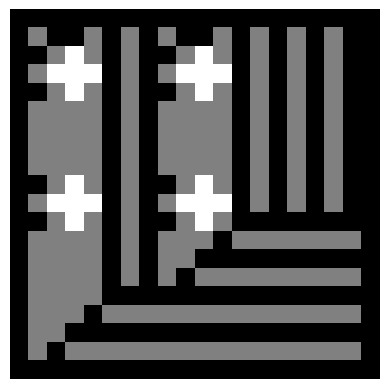

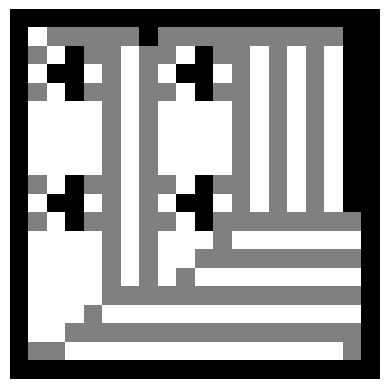

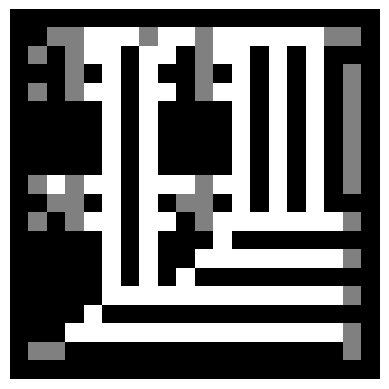

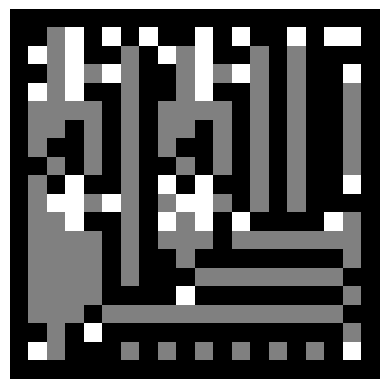

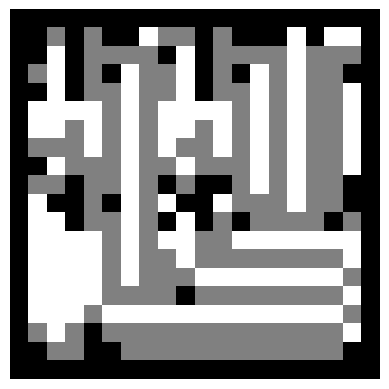

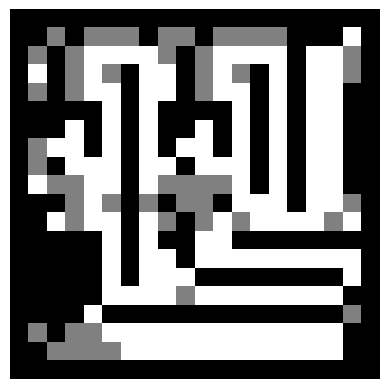

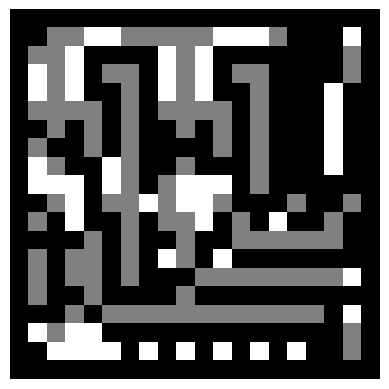

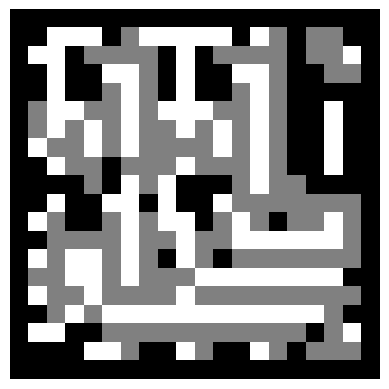

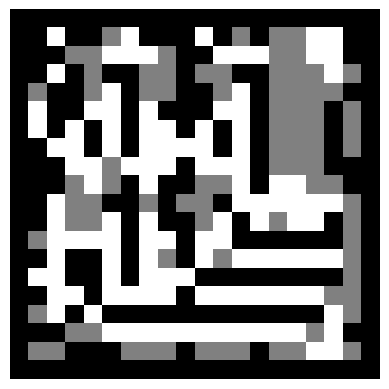

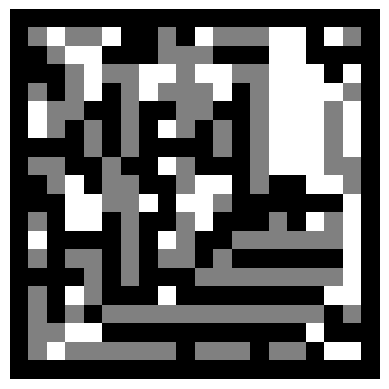

In [14]:
for _ in range(10):
    ecosystem, field = game_of_life(ecosystem)
    
    plt.imshow(ecosystem, cmap = 'gray')
    plt.axis(False)
    plt.show()

In [15]:
print(field)

[[' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ']
 [' ' 'O' 'X' 'O' 'O' 'X' ' ' ' ' 'O' ' ' 'X' 'O' 'O' 'O' 'X' 'X' ' ' 'X'
  'O' ' ']
 [' ' ' ' 'O' 'X' 'X' ' ' ' ' ' ' 'O' 'O' 'O' ' ' ' ' ' ' 'X' 'X' ' ' ' '
  ' ' ' ']
 [' ' ' ' ' ' 'O' 'X' 'O' 'O' 'X' 'X' 'O' 'X' 'X' 'O' 'O' 'X' 'X' 'X' ' '
  'X' ' ']
 [' ' 'O' ' ' 'O' 'X' ' ' 'O' 'X' 'O' 'O' 'O' 'X' ' ' 'O' 'X' 'X' 'X' 'X'
  'O' ' ']
 [' ' 'X' 'O' 'O' ' ' ' ' 'O' ' ' ' ' 'O' 'O' ' ' ' ' 'O' 'X' 'X' 'X' 'O'
  'X' ' ']
 [' ' 'X' 'O' ' ' 'O' ' ' 'O' ' ' 'X' 'O' ' ' 'O' ' ' 'O' 'X' 'X' 'X' 'O'
  'X' ' ']
 [' ' ' ' ' ' ' ' 'O' ' ' 'O' ' ' ' ' ' ' ' ' 'O' ' ' 'O' 'X' 'X' 'X' 'O'
  'X' ' ']
 [' ' 'O' 'O' ' ' ' ' 'O' ' ' ' ' 'X' 'O' ' ' ' ' ' ' 'O' 'X' 'X' 'X' 'O'
  'O' ' ']
 [' ' ' ' 'O' 'X' ' ' 'O' 'O' ' ' ' ' 'O' 'X' 'X' ' ' 'O' ' ' ' ' 'X' 'X'
  'O' ' ']
 [' ' ' ' ' ' 'X' 'X' 'O' 'O' 'X' ' ' 'X' 'X' 'O' ' ' ' ' ' ' ' ' ' ' ' '
  'X' ' ']
 [' ' 'O' ' ' 'X' 'X' ' ' 'O' ' ' ' ' 'O' 'X' ' ' ' ' ' ' 'O' ' '